## Stock Market Prediction

### Autoregressive Integrated Moving Average (ARIMA) algorithm for Time Series Analysis

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  import sys


In [44]:
df = pd.read_csv("C:/Users/DELL/Downloads/groupeddf.csv")
df.head(10)

,Code,Date,Open,High,Low,Close,Volume
0,3IINFOTECH,2014-12-18,7.437910,7.446311,7.427869,7.435041,2538.135246
1,3IINFOTECH,2014-12-19,7.582241,7.597414,7.571207,7.583621,2778.203448
2,3IINFOTECH,2014-12-22,7.782296,7.793385,7.769650,7.781907,6414.482490
3,3IINFOTECH,2014-12-23,7.771465,7.778030,7.762879,7.769444,1944.929293
4,3IINFOTECH,2014-12-24,8.321127,8.347465,8.294648,8.321972,10216.726761
5,3IINFOTECH,2014-12-26,8.499172,8.517881,8.485762,8.504636,52045.635762
6,3IINFOTECH,2014-12-29,9.390217,9.418071,9.358560,9.386957,21635.451087
7,3IINFOTECH,2014-12-30,9.121958,9.140356,9.106677,9.124332,6166.682493
8,3IINFOTECH,2014-12-31,9.409392,9.434392,9.388122,9.410359,12830.422652
9,3IINFOTECH,2015-01-01,9.611657,9.631461,9.592275,9.612921,14989.721910


In [45]:
df.shape

(79322, 7)

In [46]:
df = df.dropna()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79322 entries, 3IINFOTECH to TWL
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    79322 non-null  object 
 1   Open    79322 non-null  float64
 2   High    79322 non-null  float64
 3   Low     79322 non-null  float64
 4   Close   79322 non-null  float64
 5   Volume  79322 non-null  float64
dtypes: float64(5), object(1)
memory usage: 6.7+ MB


In [47]:
unique_values = df["Code"].unique()  
df=df.set_index("Code")

In [48]:
def arima_model(train, test):
    past = [x for x in train]
    predictions = list()
    for m in range(len(test)):
        model = ARIMA(past, order=(1,1 ,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        store = output[0]
        predictions.append(store[0])
        exp = test[m]
        past.append(exp)
        print('predicted value = %f, expected value = %f' % (store, exp))
    return predictions

In [49]:
def parser(x):
    return datetime.strptime(x, '%Y-%m')

Company name : 3IINFOTECH


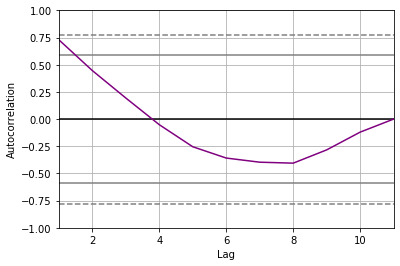

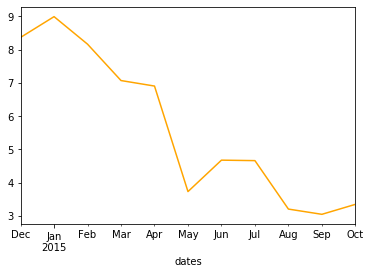

predicted value = 2.521238, expected value = 4.663048
predicted value = 3.813087, expected value = 3.206145
predicted value = 2.901418, expected value = 3.048606
predicted value = 2.162019, expected value = 3.348171
RMSE: 1.263


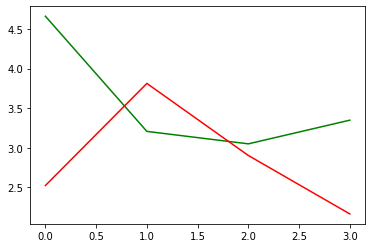

Company name : 8KMILES


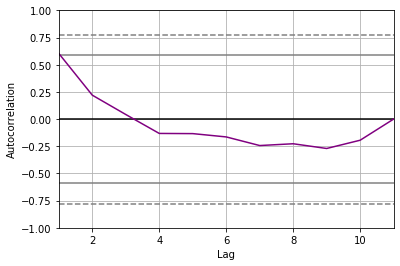

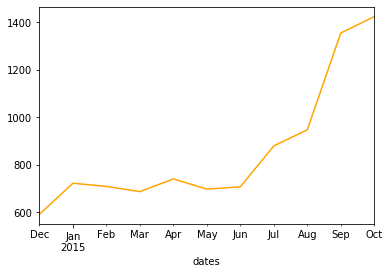

predicted value = 721.484519, expected value = 879.681825
predicted value = 863.211695, expected value = 947.393459
predicted value = 990.871242, expected value = 1354.689960
predicted value = 1500.079643, expected value = 1423.700000
RMSE: 206.344


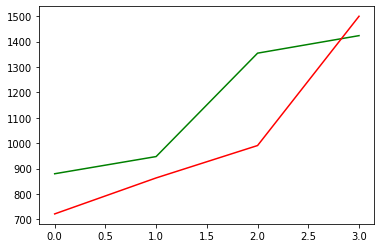

Company name : ABAN


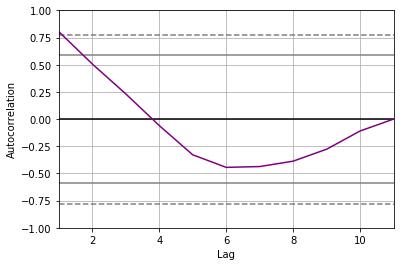

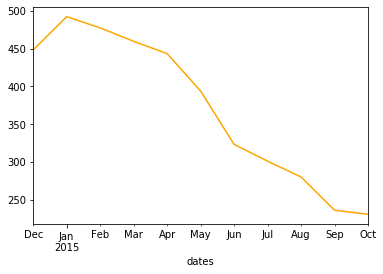

predicted value = 270.351902, expected value = 301.090843
predicted value = 282.759995, expected value = 280.225539
predicted value = 262.294793, expected value = 236.175711
predicted value = 205.946926, expected value = 230.738636
RMSE: 23.707


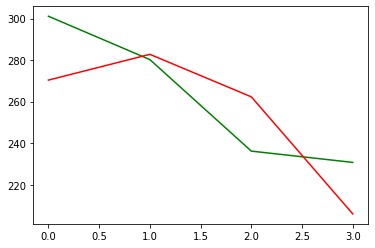

Company name : ABB


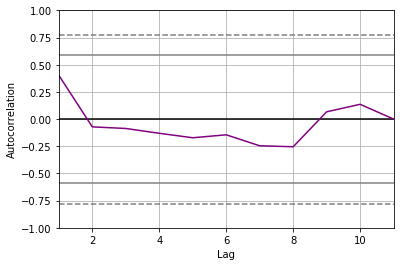

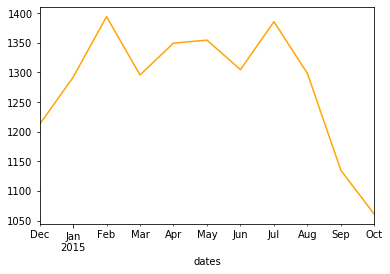

predicted value = 1340.508085, expected value = 1385.768171
predicted value = 1381.581589, expected value = 1298.446334
predicted value = 1363.649699, expected value = 1134.712187
predicted value = 1139.773055, expected value = 1060.549670
RMSE: 130.047


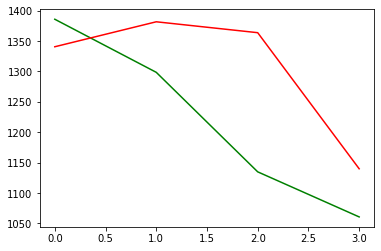

Company name : ABBOTINDIA


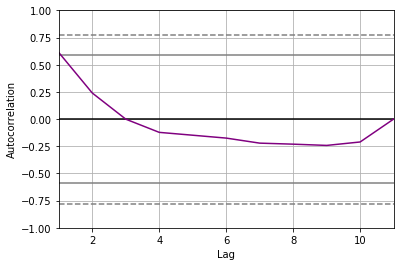

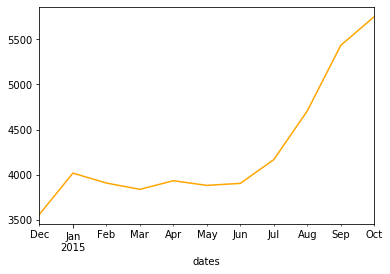

predicted value = 3939.385900, expected value = 4168.029799
predicted value = 4103.432054, expected value = 4706.805640
predicted value = 4982.864299, expected value = 5432.858477
predicted value = 6008.213684, expected value = 5750.471627
RMSE: 413.903


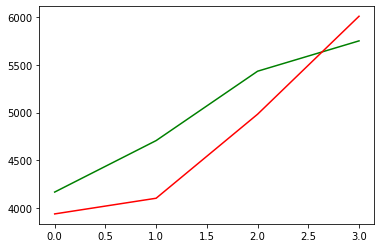

In [53]:
for company in unique_values[:5]:
    data=(df.loc[company,:]).reset_index()
    print ("Company name : %s" %company)
    data['Price'] = data['Close']
    data['Date'] = data['Date'].map(lambda x: str(x)[:7])
    Quantity_date = data[['Price','Date']]
    QDcount = Quantity_date.groupby(['Date'])['Price'].aggregate('mean').reset_index().sort_values(by='Date', ascending=0)
    date = list(QDcount['Date'])
    quantity=list(QDcount['Price'])
    date_quantity = pd.DataFrame({'dates': date, 'quantity':quantity})
    date_quantity.index = date_quantity['dates'].map(lambda x: parser(x))
    date_quantity['quantity'] = date_quantity['quantity'].map(lambda x: float(x))
    date_quantity = date_quantity.fillna(date_quantity.bfill())
    date_quantity = date_quantity['quantity'].resample('MS').mean()
    
    #autosorelation plot
    autocorrelation_plot(date_quantity,color='purple')
    plt.show()
    
    #date and prices plot
    date_quantity.plot(color='orange')
    plt.show()
    
    #train and test data
    quantity = date_quantity.values
    size = int(len(quantity) * 0.66)
    train, test = quantity[0:size], quantity[size:len(quantity)]
    
    #fit in model
    predictions = arima_model(train, test)
    
    #rmse 
    error = math.sqrt(mean_squared_error(test, predictions))
    print('RMSE: %.3f' % error)
    
    #plot graph
    plt.plot(test,color='green' )
    plt.plot(predictions, color='red')
    plt.show()

___